# STA 141B: Homework 3
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Zhihao

Last Name: Meng

Student ID: 915537642

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Fruits and Veggies

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
import seaborn as sns
import matplotlib.pyplot as plt
import os

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
allfiles1=os.listdir('C:\\Users\\HP\\sta141b-hw3-Zhihao2018\\assignment3_data\\fruit')
data1=pd.DataFrame()
for i in range(len(allfiles1)):
    b=pd.read_excel(os.path.join('C:\\Users\\HP\\sta141b-hw3-Zhihao2018\\assignment3_data\\fruit',allfiles1[i])) 
    b=b.iloc[:,0:7]
    b.columns=['a','b','c','d','e','f','g']
    fresh=b.a.str.contains('Fresh')
    fresh=fresh.fillna(False)
    b=b.loc[fresh,:]
    b=b.drop(['c','f'],axis=1)
    name=allfiles1[i].split('.')[0]
    b.insert(0,'h','fruit')
    b.insert(0,'i',name)
    b.columns=['food','type','form','price_per_lb','yield','lb_per_cup','price_per_cup']
    data1=data1.append(b)
data1.index=range(0,len(data1['food']))
data1

,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,apples,fruit,Fresh1,1.56752,0.9,0.242508,0.422373
1,apricots,fruit,Fresh1,3.04007,0.93,0.363763,1.1891
2,bananas,fruit,Fresh1,0.566983,0.64,0.330693,0.292965
3,blackberries,fruit,Fresh1,5.77471,0.96,0.31967,1.92292
4,blueberries,fruit,Fresh1,4.73462,0.95,0.31967,1.59318
5,cantaloupe,fruit,Fresh1,0.535874,0.51,0.374786,0.3938
6,cherries,fruit,Fresh1,3.59299,0.92,0.341717,1.33455
7,grapefruit,fruit,Fresh1,0.897802,0.49,0.462971,0.848278
8,grapes,fruit,Fresh1,2.09383,0.96,0.330693,0.721266
9,honeydew,fruit,Fresh1,0.796656,0.46,0.374786,0.649077


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [29]:
allfiles2=os.listdir('C:\\Users\\HP\\sta141b-hw3-Zhihao2018\\assignment3_data\\vegetables')
data2=pd.DataFrame()
for j in range(len(allfiles2)):
    c=pd.read_excel(os.path.join('C:\\Users\\HP\\sta141b-hw3-Zhihao2018\\assignment3_data\\vegetables',allfiles2[j])) 
    c=c.iloc[:,0:7]
    c.columns=['a','b','c','d','e','f','g']
    fresh=c.a.str.contains('Fresh')
    fresh=fresh.fillna(False)
    c=c.loc[fresh,:]
    c=c.drop(['c','f'],axis=1)
    name=allfiles2[j].split('.')[0]
    c.insert(0,'h','vegetable')
    c.insert(0,'i',name)
    c.columns=['food','type','form','price_per_lb','yield','lb_per_cup','price_per_cup']
    data2=data2.append(c)
data2.index=range(0,len(data2['food']))
data2

,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,acorn_squash,vegetable,Fresh1,1.17225,0.458554,0.451948,1.15536
1,artichoke,vegetable,Fresh1,2.21305,0.375309,0.385809,2.27497
2,asparagus,vegetable,Fresh1,3.21349,0.493835,0.396832,2.58227
3,avocados,vegetable,Fresh1,2.23587,0.740753,0.31967,0.964886
4,broccoli,vegetable,Fresh,,,,NaN
5,brussels_sprouts,vegetable,Fresh1,2.76355,1.06,0.341717,0.890898
6,butternut_squash,vegetable,Fresh1,1.24474,0.714,0.451948,0.787893
7,cabbage,vegetable,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944
8,cabbage,vegetable,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412
9,carrots,vegetable,Fresh,NaN,NaN,NaN,NaN


My code does not produce the correct prices for tomatoes. Because the fresh prices for tomatoes are NAs. Some files such as broccoli,carrot and so on also have the same problem. 

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [30]:
freshfruit=data1

In [31]:
freshvegetable=data2.dropna(axis=0)
freshvegetable.index=range(0,len(freshvegetable['food']))
freshvegetable

,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,acorn_squash,vegetable,Fresh1,1.17225,0.458554,0.451948,1.15536
1,artichoke,vegetable,Fresh1,2.21305,0.375309,0.385809,2.27497
2,asparagus,vegetable,Fresh1,3.21349,0.493835,0.396832,2.58227
3,avocados,vegetable,Fresh1,2.23587,0.740753,0.31967,0.964886
4,brussels_sprouts,vegetable,Fresh1,2.76355,1.06,0.341717,0.890898
5,butternut_squash,vegetable,Fresh1,1.24474,0.714,0.451948,0.787893
6,cabbage,vegetable,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944
7,cabbage,vegetable,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412
8,collard_greens,vegetable,Fresh1,2.63084,1.16,0.286601,0.650001
9,corn_sweet,vegetable,Fresh1,2.69062,0.54,0.363763,1.8125


In [32]:
for i in range(3,freshfruit.shape[1]):
    freshfruit.iloc[:,i]=np.float64(freshfruit.iloc[:,i])
freshfruit.dtypes

food              object
type              object
form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
dtype: object

In [33]:
for j in range(3,freshvegetable.shape[1]):
    freshvegetable.iloc[:,j]=np.float64(freshvegetable.iloc[:,j])
freshvegetable.dtypes

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


food              object
type              object
form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
dtype: object

In [34]:
freshdata=freshfruit.append(freshvegetable)
freshdata.index=range(0,len(freshdata['form']))
freshdata

,food,type,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,apples,fruit,Fresh1,1.567515,0.900000,0.242508,0.422373
1,apricots,fruit,Fresh1,3.040072,0.930000,0.363763,1.189102
2,bananas,fruit,Fresh1,0.566983,0.640000,0.330693,0.292965
3,blackberries,fruit,Fresh1,5.774708,0.960000,0.319670,1.922919
4,blueberries,fruit,Fresh1,4.734622,0.950000,0.319670,1.593177
5,cantaloupe,fruit,Fresh1,0.535874,0.510000,0.374786,0.393800
6,cherries,fruit,Fresh1,3.592990,0.920000,0.341717,1.334548
7,grapefruit,fruit,Fresh1,0.897802,0.490000,0.462971,0.848278
8,grapes,fruit,Fresh1,2.093827,0.960000,0.330693,0.721266
9,honeydew,fruit,Fresh1,0.796656,0.460000,0.374786,0.649077


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

#1.4.1

In [35]:
food=freshfruit['food']
prices=freshfruit['price_per_lb']
foodprice=pd.DataFrame({'food':[x for x in food],'price':[y for y in prices]},index=range(0,len(food)))
foodprice[foodprice['price']==max(prices)]

,food,price
20,raspberries,6.975811


In [36]:
foodprice[foodprice['price']==min(prices)]

,food,price
23,watermelon,0.333412


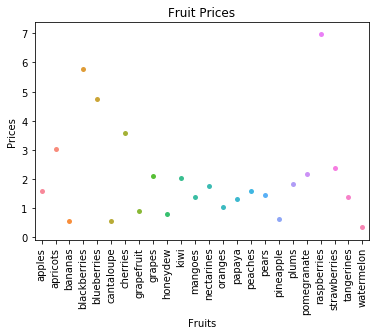

In [37]:
ax= sns.stripplot(x =food, y =prices)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set(title = "Fruit Prices", xlabel = "Fruits", ylabel = "Prices")
plt.show()

From the results and plot above we can see that raspberries are the most expensive whose price is 6.98 per lb. Watermelons are the least expensive whose price is 0.33 per lb.

#1.4.2

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


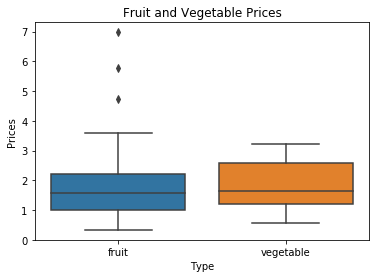

In [38]:
ax = sns.boxplot(x = "type", y = "price_per_lb", data = freshdata)
ax.set(title = "Fruit and Vegetable Prices", xlabel = "Type", ylabel = "Prices")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
plt.show()

From the boxplot we can see that the mixmum, first quantile, median, mean and third quantile of vegetables are larger than those of fruits. But the maxmun of vegetables is samller than that of fruits. And there are three outliers in the fruits' prices. The distribution of prices of  fruits is more widely than that of vegetables.

#1.4.3

In [39]:
ratio=freshdata['price_per_lb']/freshdata['yield']
food1=freshdata['food']
foodratio=pd.DataFrame({'food':[x for x in freshdata['food']],'ratio':[y for y in ratio]},index=range(0,len(freshdata['food'])))
foodratio[foodratio['ratio']==min(ratio)]

,food,ratio
23,watermelon,0.641177


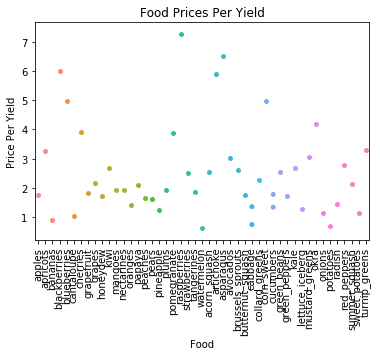

In [40]:
ax= sns.stripplot(x =food1, y = ratio)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set(title = "Food Prices Per Yield", xlabel = "Food", ylabel = "Price Per Yield")
plt.show()

I think the food which has the least price per yield has the best value for price. From the result and plot above,we can see that watermelon has the best value for the price which price per yield is 0.64. 

#1.4.4

The thing that surprises me most is there are some values of yield larger than 1. 

#1.4.5

I think cabbage provide the best combination of price, yield, and nutrition.